# SyriaTel Customer Churn

![logo](images/syriatel_logo.png)
![picture](images/telekomunikace.png)

# Overview

SyriaTel, a leading telecommunications company, is facing challenges in retaining its customer base. Customer churn, the phenomenon where customers discontinue their services, is a significant concern as it not only impacts revenue but also affects the company's reputation in a competitive market. Identifying patterns and predicting customer churn can provide valuable insights to proactively address issues and implement strategies to retain customers.

# Problem Statement

The business problem at hand is to develop a predictive model that can accurately identify customers at risk of churning from SyriaTel's services. By leveraging historical customer data and relevant features, the goal is to create a classifier that can distinguish between customers likely to continue their services and those likely to churn in the near future.

Objectives:

* Prediction: Develop a robust binary classification model to predict customer churn accurately.
* Identify Key Factors: Identify and analyze the key features contributing to customer churn.
* Proactive Retention Strategies: Provide actionable insights to the business to implement targeted retention strategies for at-risk customers.
* Revenue Protection: Minimize revenue loss by reducing the number of customers who discontinue services.

***
# Data Understanding
***
Data imported from <a href="https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/code">Kaggle</a>
 

In [1]:
# Importing necessary libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Importing dataset

data = pd.read_csv("bigml.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Data has `3333` entries and `21` columns 

Column data type distribution
* 1 - boolean
* 8 - floats
* 8 - integers
* 4 - objects 

In [4]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

No `null values` in the dataset


# Looking at churn's distribution

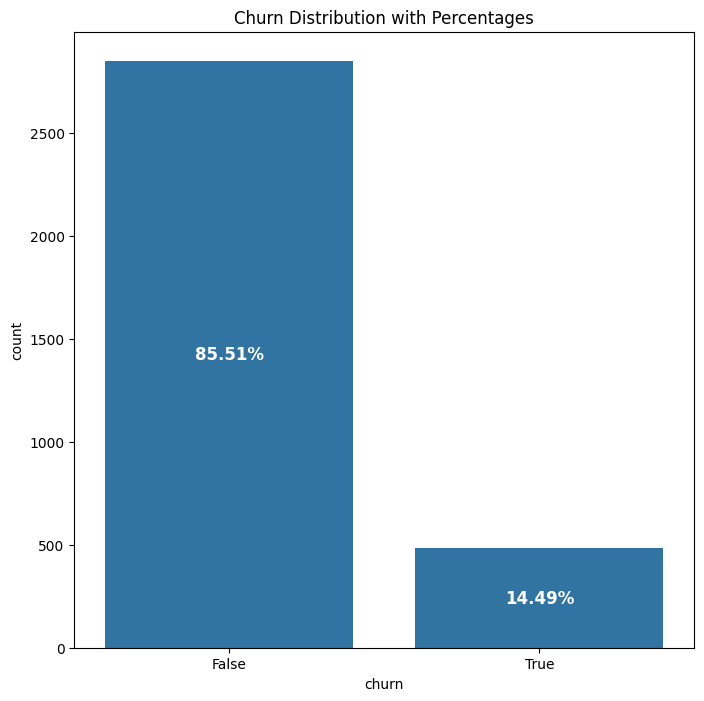

In [6]:
# Creating a countplot with annotations
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.countplot(x='churn', data=data)

# Calculating the percentage for each category
total_count = len(data)
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total_count:.2f}%"
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=12, weight='bold')



plt.title('Churn Distribution with Percentages')
plt.show()


This indicates that the dataset is imbalanced with a higher prevalence of non-churned instances - False of 85.51% and only 14.49% of class 1 - True.

In [7]:
# Checking all columns
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

***
# Data Preparation
***

In [8]:
# Mapping values yes and no to 1 and 0
data[["international plan", "voice mail plan"]] = data[["international plan", "voice mail plan"]].replace({"yes" : 1, "no": 0 })
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
# confirming international plan and voice mail are converted to intergers
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

One Hot Encoding state and area code

In [10]:
data = pd.get_dummies(data, columns=['state', 'area code'], dtype=int)
data.head()

,account length,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,128,382-4657,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,1,0
1,107,371-7191,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,1,0
2,137,358-1921,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,1,0
3,84,375-9999,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,1,0,0
4,75,330-6626,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,1,0


Dropping phone number column as it does not affect churn

In [11]:
data = data.drop(columns=['phone number'])
data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0


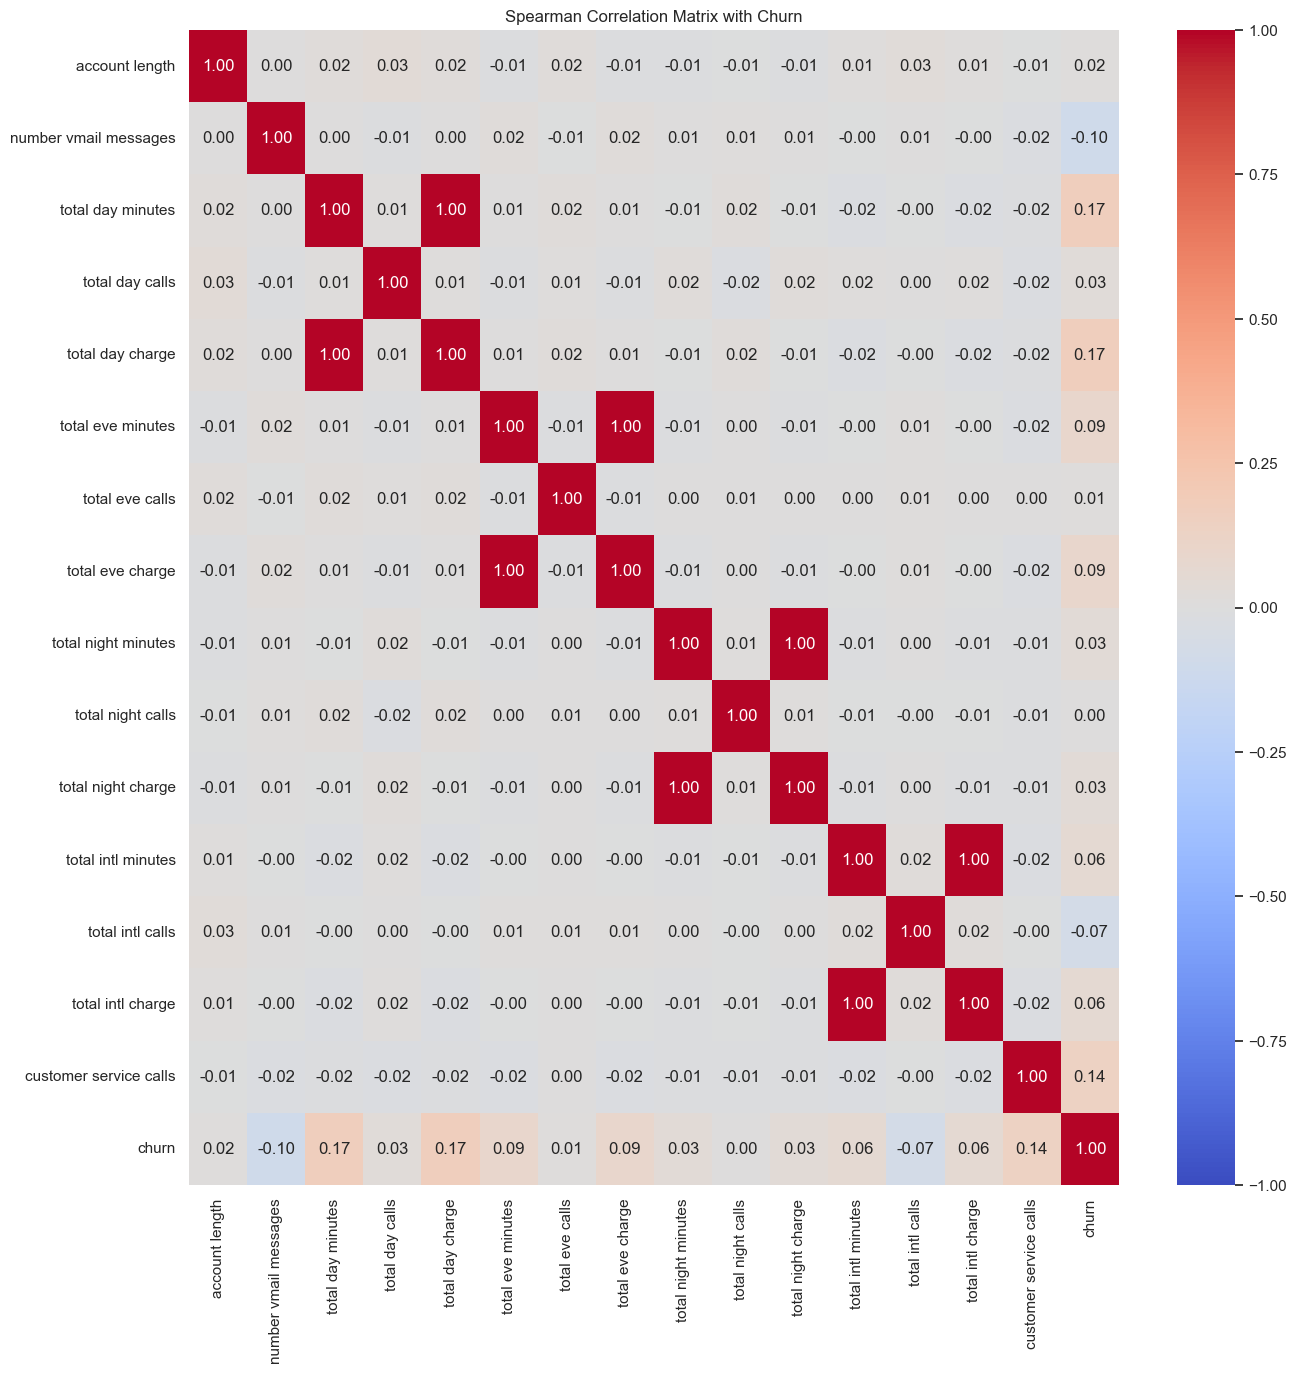

In [12]:
# Calculating correlation between features
num_features = ['account length', 'number vmail messages','total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge','total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'] # are numeric features

# Calculating Spearman correlation matrix
correlation_to_churn = data[num_features + ['churn']].corr(method='spearman')

# Creating a heatmap
plt.figure(figsize=(15, 15))
sns.set(font_scale=1)
sns.heatmap(correlation_to_churn, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix with Churn')
plt.show()

In [13]:
# converting boolean churn to numeric
data["churn"] = data["churn"].astype(int)
data.dtypes

account length             int64
international plan         int64
voice mail plan            int64
number vmail messages      int64
total day minutes        float64
                          ...   
state_WV                   int32
state_WY                   int32
area code_408              int32
area code_415              int32
area code_510              int32
Length: 72, dtype: object

***
# Modelling
***

# Splitting data into train and test sets

In [14]:
# Assigning variables X and y
X = data.drop("churn", axis=1)
y = data["churn"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing scaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the logistic regression model with an increased number of iterations
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_baseline = baseline_model.predict(X_test_scaled)

# Evaluating the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
conf_matrix_baseline = confusion_matrix(y_test, y_pred_baseline)
classification_report_baseline = classification_report(y_test, y_pred_baseline, output_dict=True)

# Organizing metrics in a DataFrame
metrics_df_baseline = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (class 0)', 'Precision (class 1)', 'Recall (class 0)', 'Recall (class 1)', 'F1-score (class 0)', 'F1-score (class 1)'],
    'Value': [accuracy_baseline,
              classification_report_baseline['0']['precision'],
              classification_report_baseline['1']['precision'],
              classification_report_baseline['0']['recall'],
              classification_report_baseline['1']['recall'],
              classification_report_baseline['0']['f1-score'],
              classification_report_baseline['1']['f1-score']]
})


print(metrics_df_baseline)


                Metric     Value
0             Accuracy  0.856072
1  Precision (class 0)  0.871835
2  Precision (class 1)  0.571429
3     Recall (class 0)  0.973498
4     Recall (class 1)  0.198020
5   F1-score (class 0)  0.919866
6   F1-score (class 1)  0.294118


The model is predicting all instances as class 1, resulting in high precision for class 1 but low recall and F1-score for class 0. This indicates an issue with class imbalance and highlights the need for further model tuning or the exploration of alternative algorithms.

***

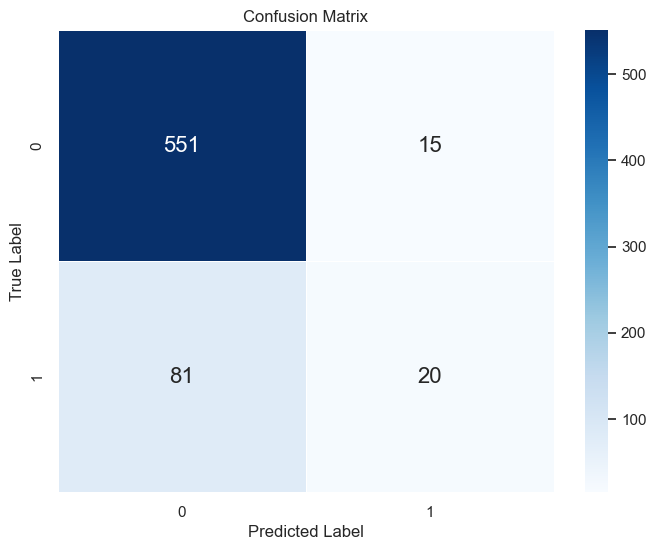

In [15]:
# Displaying confusion matrix for baseline logistic regression model
cm = confusion_matrix(y_test, y_pred_baseline)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

This indicates that the model is classifying all instances as class 1, resulting in a high number of false positives and no true negatives. This suggests a severe issue with the model, possibly due to class imbalance

***

# K-Nearest Neighbors Classifier

In [16]:
# Initializing KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn_classifier.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Evaluating the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Organizing metrics in a DataFrame
metrics_df_knn = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (class 0)', 'Precision (class 1)', 'Recall (class 0)', 'Recall (class 1)', 'F1-score (class 0)', 'F1-score (class 1)'],
    'Value': [accuracy_knn,
              classification_report_knn['0']['precision'],
              classification_report_knn['1']['precision'],
              classification_report_knn['0']['recall'],
              classification_report_knn['1']['recall'],
              classification_report_knn['0']['f1-score'],
              classification_report_knn['1']['f1-score']]
})

# Display the metrics DataFrame for KNN
print("KNN Metrics:")
print(metrics_df_knn)

KNN Metrics:
                Metric     Value
0             Accuracy  0.850075
1  Precision (class 0)  0.855183
2  Precision (class 1)  0.545455
3     Recall (class 0)  0.991166
4     Recall (class 1)  0.059406
5   F1-score (class 0)  0.918167
6   F1-score (class 1)  0.107143


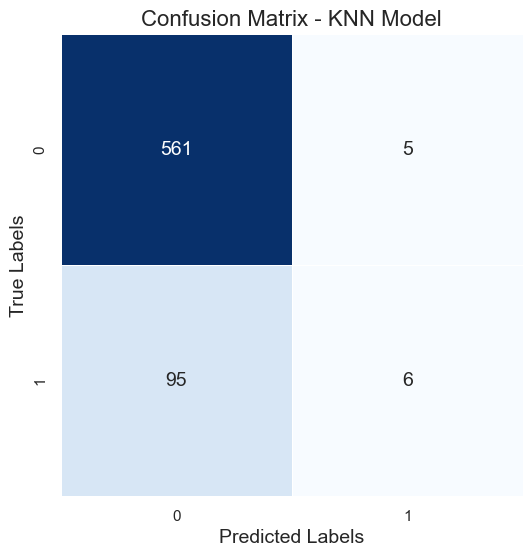

In [17]:
# Visualizing KNN Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, square=True)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix - KNN Model', fontsize=16)
plt.show()


# Hyperparameter Tuning 

using GridSearchCV

In [18]:
# Defining the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=1)

# Defining hyperparameters and their possible values
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating GridSearchCV
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy')

# Fitting the grid search to the data
grid_search_dt.fit(X_train_scaled, y_train)

# Getting the best hyperparameters
best_params_dt = grid_search_dt.best_params_
print(f"Best Hyperparameters for Decision Tree: {best_params_dt}")

# Using the best model to make predictions
y_pred_tuned_dt = grid_search_dt.predict(X_test)

# Evaluating the tuned model
accuracy_tuned_dt = accuracy_score(y_test, y_pred_tuned_dt)
print(f"Tuned Decision Tree Accuracy: {accuracy_tuned_dt}")


Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Tuned Decision Tree Accuracy: 0.39580209895052476


c:\Users\Beth Gikonyo\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [19]:
# Using the best model to make predictions
y_pred_tuned_dt = grid_search_dt.predict(X_test_scaled)

# Calculating various metrics
accuracy_tuned_dt = accuracy_score(y_test, y_pred_tuned_dt)
precision_tuned_dt = precision_score(y_test, y_pred_tuned_dt)
recall_tuned_dt = recall_score(y_test, y_pred_tuned_dt)
f1_tuned_dt = f1_score(y_test, y_pred_tuned_dt)
conf_matrix_tuned_dt = confusion_matrix(y_test, y_pred_tuned_dt)


# Creating a DataFrame for the tuned Decision Tree metrics
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy_tuned_dt, precision_tuned_dt, recall_tuned_dt, f1_tuned_dt]
}

metrics_df_tuned_dt = pd.DataFrame(metrics_data)

print(metrics_df_tuned_dt)


      Metric     Value
0   Accuracy  0.932534
1  Precision  0.833333
2     Recall  0.693069
3   F1-Score  0.756757


In [20]:
# Displaying metrics for the Logistic Regression model
print("Logistic Regression Metrics:")
print(metrics_df_baseline)

# Displaying metrics for the tuned Decision Tree model
print("\nTuned Decision Tree Metrics:")
print(metrics_df_tuned_dt)

# Displaying metrics for the KNN model
print("\nKNN Metrics:")
print(metrics_df_knn)

# Calculating various metrics for the KNN model
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Comparing specific metrics (i.e. Accuracy, Precision, Recall, F1-Score)
comparison_data = {
    'Metric': ['Accuracy', 'Precision (class 1)', 'Recall (class 1)', 'F1-score (class 1)'],
    'Logistic Regression': [accuracy_baseline, classification_report_baseline['1']['precision'],
                            classification_report_baseline['1']['recall'], classification_report_baseline['1']['f1-score']],
    'Tuned Decision Tree': [accuracy_tuned_dt, precision_tuned_dt, recall_tuned_dt, f1_tuned_dt],
    'KNN': [accuracy_knn, precision_knn, recall_knn, f1_knn]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nComparison of Logistic Regression, Tuned Decision Tree, and KNN:")
print(comparison_df)


Logistic Regression Metrics:
                Metric     Value
0             Accuracy  0.856072
1  Precision (class 0)  0.871835
2  Precision (class 1)  0.571429
3     Recall (class 0)  0.973498
4     Recall (class 1)  0.198020
5   F1-score (class 0)  0.919866
6   F1-score (class 1)  0.294118

Tuned Decision Tree Metrics:
      Metric     Value
0   Accuracy  0.932534
1  Precision  0.833333
2     Recall  0.693069
3   F1-Score  0.756757

KNN Metrics:
                Metric     Value
0             Accuracy  0.850075
1  Precision (class 0)  0.855183
2  Precision (class 1)  0.545455
3     Recall (class 0)  0.991166
4     Recall (class 1)  0.059406
5   F1-score (class 0)  0.918167
6   F1-score (class 1)  0.107143

Comparison of Logistic Regression, Tuned Decision Tree, and KNN:
                Metric  Logistic Regression  Tuned Decision Tree       KNN
0             Accuracy             0.856072             0.932534  0.850075
1  Precision (class 1)             0.571429             0.833333  0.

Here's an interpretation of the results:

* `Accuracy`: The Tuned Decision Tree model has higher accuracy, indicating it performs better overall.
* `Precision(class 1)`:Precision measures the accuracy of positive predictions. The Tuned Decision Tree has significantly higher precision for predicting class 1, meaning it has fewer false positives.
* `Recall (class 1)`: Recall measures the ability of the model to capture all relevant instances. The Tuned Decision Tree has a much higher recall for predicting class 1, indicating it captures more actual positives.
* `F1-Score(class 1)`: The F1-Score is the harmonic mean of precision and recall. The Tuned Decision Tree has a higher F1-Score for predicting class 1, indicating a better balance between precision and recall.

In summary, the tuned Decision Tree model stands out with significantly improved accuracy, precision, recall, and F1-score compared to Logistic Regression and KNN. Tuned Decision Tree is recommended for predicting customer churn in this scenario due to its balanced and improved performance across multiple metrics.
***

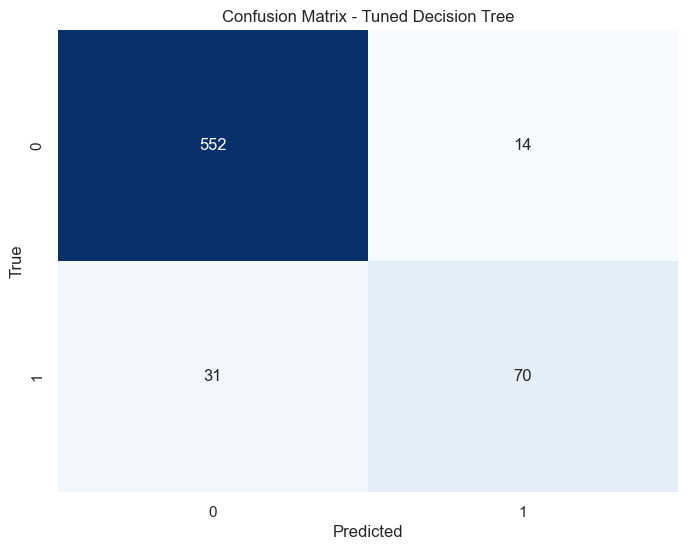

In [21]:
# Plotting confusion matrix for the tuned Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned_dt, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Tuned Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

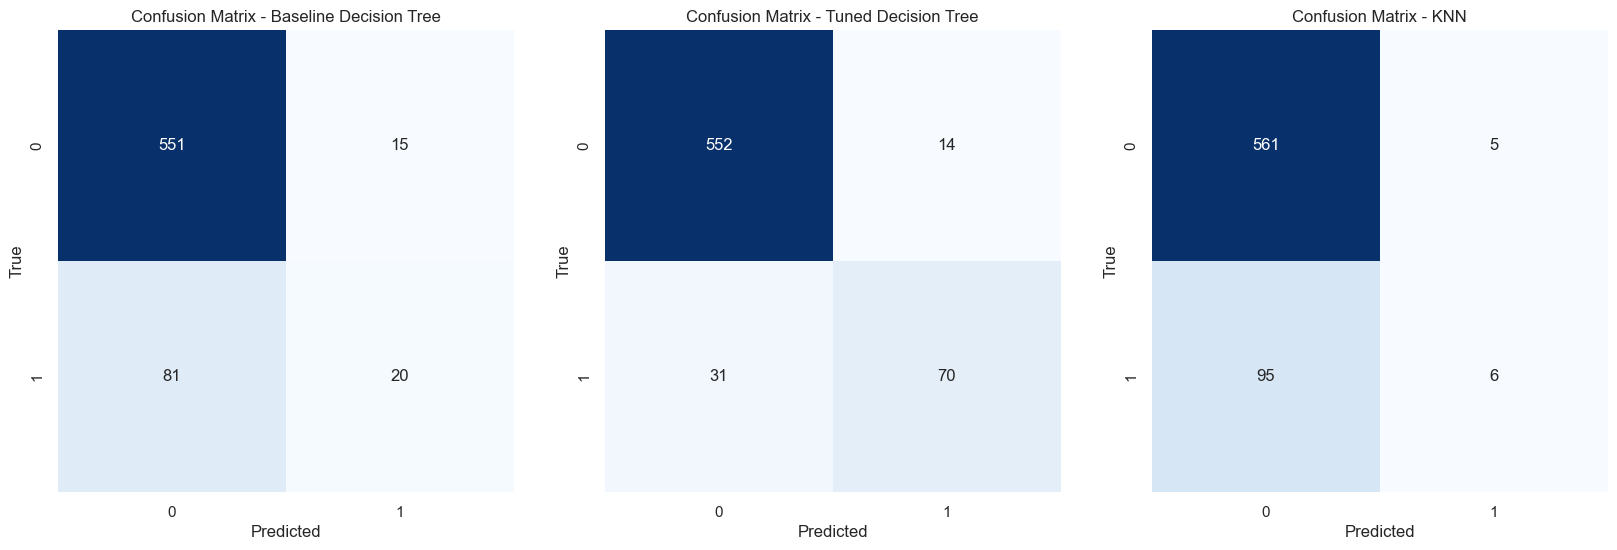

In [22]:
# Plotting all three confusion matrices
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Baseline Decision Tree
sns.heatmap(conf_matrix_baseline, annot=True, fmt='g', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix - Baseline Decision Tree')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Tuned Decision Tree
sns.heatmap(conf_matrix_tuned_dt, annot=True, fmt='g', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix - Tuned Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

# KNN
sns.heatmap(conf_matrix_knn, annot=True, fmt='g', cmap='Blues', cbar=False, ax=axes[2])
axes[2].set_title('Confusion Matrix - KNN')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.show()



The Tuned Decision Tree has a better trade-off between true positives and false positives, making it a more effective model in identifying actual churn instances while minimizing incorrect predictions.

# Comparing the three models:

* The tuned Decision Tree has significantly improved in correctly predicting positive cases (churn) with an increase in True Positives and a decrease in False Negatives.
* The tuned model also reduced the number of False Positives, indicating fewer instances where the model incorrectly predicted positive cases.

In terms of accuracy, precision, recall, and F1-score, the tuned Decision Tree outperforms the baseline model and the KNN model. The improvements are particularly notable in correctly identifying customers who are likely to churn.

| Model                  | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
|------------------------|----------|----------------------|------------------|--------------------|
| Logistic Regression    | 0.856    | 0.571                | 0.198            | 0.294              |
| Tuned Decision Tree    | 0.933    | 0.833                | 0.693            | 0.757              |
| KNN                    | 0.850    | 0.545                | 0.059            | 0.107              |


***
# The top 10 features based on their importance scores

C:\Users\Beth Gikonyo\AppData\Local\Temp\ipykernel_8096\2168197850.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


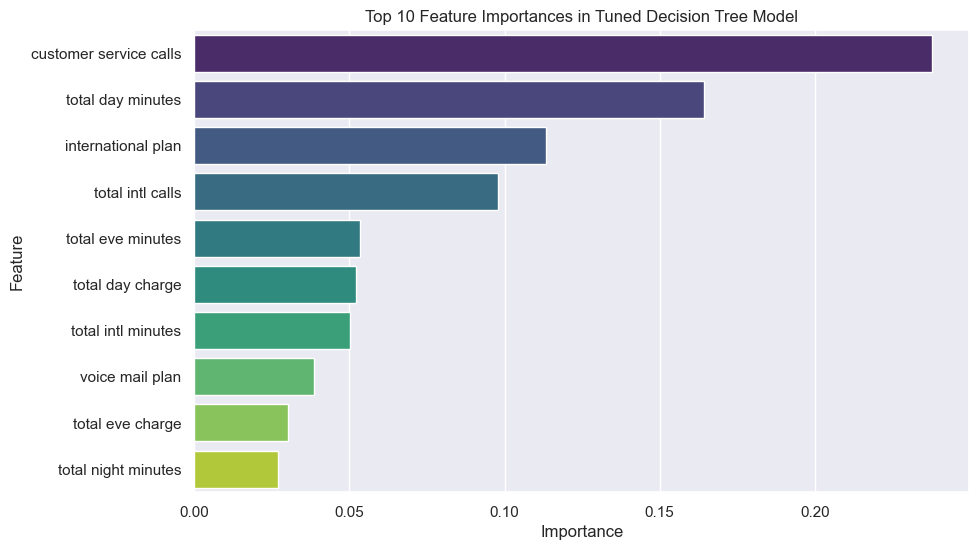

Top 10 Features:
                   Feature  Importance
16  customer service calls    0.237933
4        total day minutes    0.164193
1       international plan    0.113434
14        total intl calls    0.097993
7        total eve minutes    0.053306
6         total day charge    0.052047
13      total intl minutes    0.050191
2          voice mail plan    0.038585
9         total eve charge    0.030333
10     total night minutes    0.026819


In [25]:
# Get feature importances from the tuned Decision Tree model
feature_importances = grid_search_dt.best_estimator_.feature_importances_

# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Specify the number of top features to display
top_n = 10  # You can adjust this value based on your preference

# Get the top n features
top_features = importance_df.head(top_n)

# Visualize the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title(f'Top {top_n} Feature Importances in Tuned Decision Tree Model')
plt.show()

# listing top 10 features
top_10_features = importance_df.head(10)

print("Top 10 Features:")
print(top_10_features)


# 1.Customer Service Calls (Importance: 23.79%):

Customers with a higher number of customer service calls are more likely to churn.
This suggests that frequent interactions with customer service might be an indicator of dissatisfaction.

# 2. Total Day Minutes (Importance: 16.42%):

Higher usage of daytime minutes by customers is associated with an increased likelihood of churning.
This could imply that customers with high daytime usage may find the service less suitable.

# 3. International Plan (Importance: 11.34%):

Subscribers with an international plan have a relatively high impact on predicting churn.
This suggests that international plan subscribers might have specific reasons contributing to their likelihood of churning.

# Recommendations

# 1. Enhance Customer Service:

Invest in customer service training and resources to address concerns and inquiries promptly.
Implement proactive customer support measures to prevent issues before they escalate.

# 2. Personalized Plans and Offers:

Leverage customer usage data to create personalized plans and offers.
Provide targeted promotions and discounts based on individual customer preferences.

# 3. International Plan Optimization:

Analyze and optimize international plans to meet customer needs and expectations.
Consider bundling international plans with additional features to increase value.